<a href="https://colab.research.google.com/github/y109240/dataAnalysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib - 데이터 시각화
교재: 데이터 과학을 위한 파이썬 머신러닝(chapter5)

- <a href="#05.1맷플롯립">05.1 맷플롯립</a>
- <a href="#05.2시본">05.2 시본</a>
- <a href="#05.3플롯리">05.3 플롯리</a>
- <a href="#예제:전세계행복지수">예제: 전세계행복지수 분석</a>

---------------

### 라이브러리 설치

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
!pip install plotly

In [ ]:
import matplotlib
import seaborn
import plotly
print(matplotlib.__version__)
print(seaborn.__version__)
print(plotly.__version__)

3.8.4
0.13.2
5.21.0


#### 한글 폰트 사용

In [ ]:
# 설치된 폰트 출력
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

In [1]:
# 한글 폰트 사용
!sudo apt-get install -y fonts_nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotilb -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package fonts_nanum
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/opentype/mathjax: caching, new cache contents: 24 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/truetype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/glyphicons: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.

In [1]:
# basic
import time
import random
import math

#data analytics
import numpy as np
import pandas as pd

#Math
import scipy as sp
import statsmodels.api as sm

#web crawling
import requests
from bs4 import BeautifulSoup

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

### MAC OS 에서 한글 폰트 사용

In [7]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

In [2]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

------------------------------

## <a name="05.1맷플롯립">05.1 맷플롯립</a>

### 1. 맷플롯립의 구조
- 맷플롯립(matplotlib) : 매트랩(matlab) 기능을 파이썬에서 그대로 사용하도록 하는 시각화 모듈
- MATLAB: 매스웍스에서 개발한 수치 해석 및 프로그래밍 환경을 제공하는 공학용 소프트웨어. 행렬을 기반으로 한 계산 기능을 지원하며 함수나 데이터를 그림으로 그리는 기능 및 프로그래밍을 통한 알고리즘 구현 등을 제공함
- 매트랩을 포장(wrapping)해서 맷플롯립을 지원
 - - import matplotlib.pyplot as plt
<br><br>
- https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png
- https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png

#### 1.1 pyplot
- 맷플롯립을 이용할 때 가장 기본이 되는 객체
- 파이플롯(pyplot) 위에 그림(figure) 객체를 올리고 그 위에 그래프에 해당하는 축(axes)을 올림
- 그림 위에 축을 여러 장 올리면 여러 개의 그래프 작성

In [ ]:
# matplotlib 모듈 호출
import matplotlib.pyplot as plt

plt.rcParams["font.family"] == "NanumBarunGothic" # 폰트지정(한글 코랩)
plt.rcParams["figure.figsize"] = (5, 3)           # 그래프 크기
plt.rcParams["axes.unicode_minus"] = False        # 그래프에서 마이너스 표기
x1 = range(100)
x2 = range(0, 200, 2)
y = range(100)
plt.plot(x1, y, color="red", linestyle="dashed", lw=0.5, label="x1")
plt.plot(x2, y, color="green", label="x2")
plt.title("선그래프")
plt.grid()
plt.xlabel("x축제목")
plt.ylabel("y축제목")
plt.legend()
plt.show()

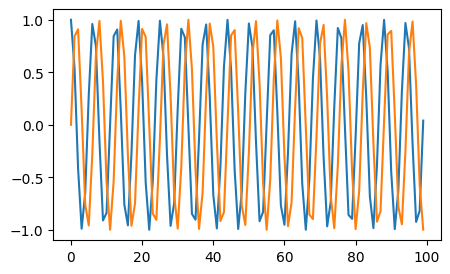

In [12]:
# numpy 모듈 호출
import numpy as np
x_1 = range(100)
y_1 = [np.cos(x) for x in x_1]
y_2 = [np.sin(x) for x in x_1]

plt.plot(x_1, y_1)
plt.plot(x_1, y_2)
plt.show()

#### 1.2 그림과 축
- fig : 그림은 그래프를 작성하는 밑바탕이 됨
- ax  : 축은 실제로 그래프를 작성하는 공간

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

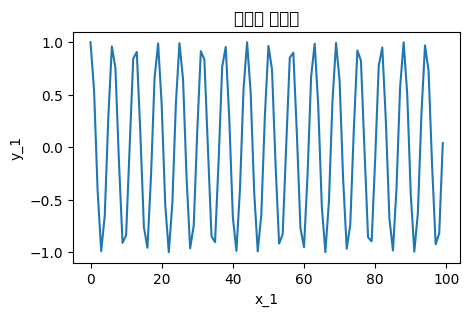

In [14]:
x_1 = range(100)
y_1 = [np.cos(x) for x in x_1]

# (1) figure와 axes 객체 할당
fig, ax = plt.subplots()

# (2) plot 함수를 사용하여 그래프 생성
ax.plot(x_1, y_1)

# (3)그래프 제목,X축 라벨,Y축 라벨 설정
ax.set(title="코사인 그래프", xlabel="x_1", ylabel="y_1")

# (4) 그래프 출력
plt.show()

### 한번에 그래프 여러개를 구성할 경우

- fig

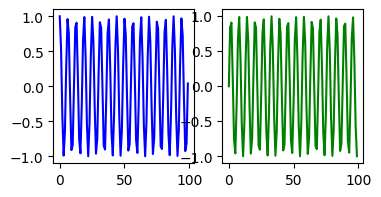

In [17]:
# (1) figure 반환
fig = plt.figure()
# (2) figure의 크기 지정
fig.set_size_inches(4,2)

# (3) 첫 번째 그래프 생성
ax_1 = fig.add_subplot(1, 2, 1)
# (4) 두 번째 그래프 생성
ax_2 = fig.add_subplot(1, 2, 2)

# (5) 첫 번째 그래프 설정
ax_1.plot(x_1, y_1, c="b")
# (6) 두 번째 그래프 설정
ax_2.plot(x_1, y_2, c="g")

plt.show()

#### 1.3 서브플롯 행렬
- 축을 여러 개 만들 때 서브플롯으로 축 객체 공간 확보
- 그림 객체에서 add_subplot 함수 사용 ,또는 plot 객체에서 subplots 함수 사용

- plt.subplots()

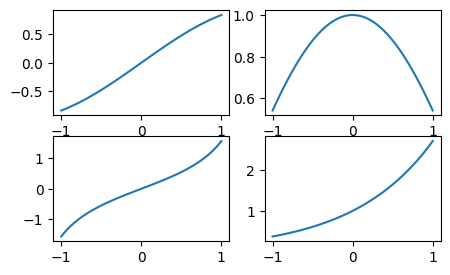

In [19]:
# (1) x 값과 y_n 값 생성
x = np.linspace(-1, 1, 100)
y_1 = np.sin(x)
y_2 = np.cos(x)
y_3 = np.tan(x)
y_4 = np.exp(x)


# (2) 2×2 figure 객체를 생성
fig, ax = plt.subplots(nrows=2, ncols=2) # (행, 열)

# (3) 첫 번째 그래프 생성
ax[0,0].plot(x, y_1)
# (4) 두 번째 그래프 생성
ax[0,1].plot(x, y_2)
# (5) 세 번째 그래프 생성
ax[1,0].plot(x, y_3)
# (6) 네 번째 그래프 생성
ax[1,1].plot(x, y_4)

plt.show()

- plt.subplot(행, 열, 번호)
- ??? 이해가 안돼요

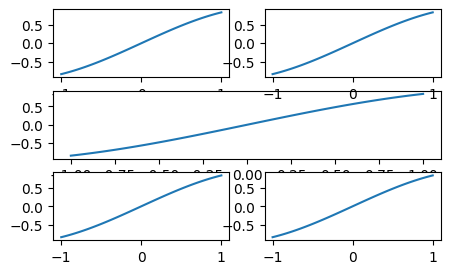

In [23]:
# (1) 첫 번째 공간에 axes 생성
ax1 = plt.subplot(3, 2, 1)
plt.plot(x, y_1)

# (2) 두 번째 공간에 axes 생성
ax2 = plt.subplot(3, 1, 2)
plt.plot(x, y_1)

# (3) 두 번째 공간에 axes 생성
ax3 = plt.subplot(3, 2, 2)
plt.plot(x, y_1)

# (4) 다섯 번째 공간에 axes 생성
ax4 = plt.subplot(3, 2, 5)
plt.plot(x, y_1)

# (5) 여섯 번째 공간에 axes 생성
ax5 = plt.subplot(3, 2, 6)
plt.plot(x, y_1)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 크기 설정
# plt.rcParams['figure.figsize'] = (10, 6)  # (가로,세로) 인치 단위
plt.figure(figsize=(10, 6))     # (10,6) 인치 그래프

# 그래프 공간 설정
fig, ax = plt.subplots(2,2)      # 2행 2열 그래프 공간
print(fig, ax)

plt.style.use('default')  # classic등등

# 선 그래프
X = np.linspace(0, 10, 100)      # 0~10사이의 선형 분포 100개
Y = np.cos(X)                    # X의 코사인 값
ax[0,0].plot(X, Y)               # 선 그래프

# 막대 그래프
X = np.arange(10)                # 0~9사이의 연속값
Y = np.random.uniform(1,10,10)   # 균일분포값 생성
ax[0,1].bar(X, Y)                # 막대 그래프

# 점 그래프
X = np.random.randn(100)         # 정규 분포를 가지는 데이터
Y = np.random.randn(100)         # 정규 분포를 가지는 데이터
ax[1,0].scatter(X, Y)

# 분포를 2D 이미지 그림으로
Z = np.random.uniform(0,1,(5,5)) # 0~1사이의 균일분포값을 5행x5열
ax[1,1].imshow(Z)                # 2D 이미지 그림으로 표현

plt.show()


--------------------

### 2. 맷플롯립으로 그래프 꾸미기

#### 2.1 색상
- color 또는 c 매개변수로 색상 변경
- RGB 값을 사용해서 #을 붙여 16진법으로 색상 표현
- b, g, r, c, m, y, k, w 등 약어 입력
- https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py

<function matplotlib.pyplot.show(close=None, block=None)>

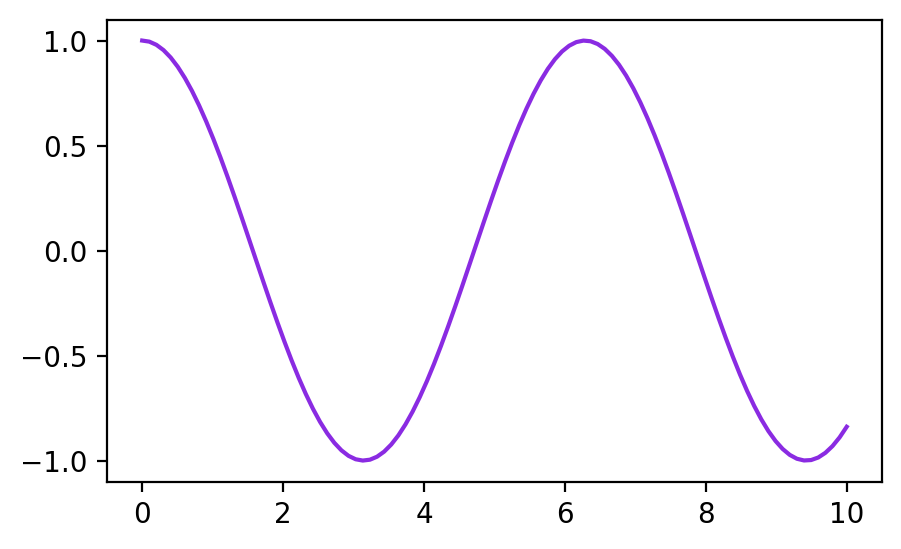

In [11]:
plt.rcParams["figure.figsize"] = (5, 3)
X = np.linspace(0, 10, 100)
Y = np.cos(X)

# plt.plot(X, Y, c="c")
plt.plot(X, Y, c="blueviolet")
plt.show

In [ ]:
# 그래프 크기 설정



#### 2.2 선의 형태
- linestyle 또는 ls로 선의 형태를 정의
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html?highlight=linestyle

<function matplotlib.pyplot.show(close=None, block=None)>

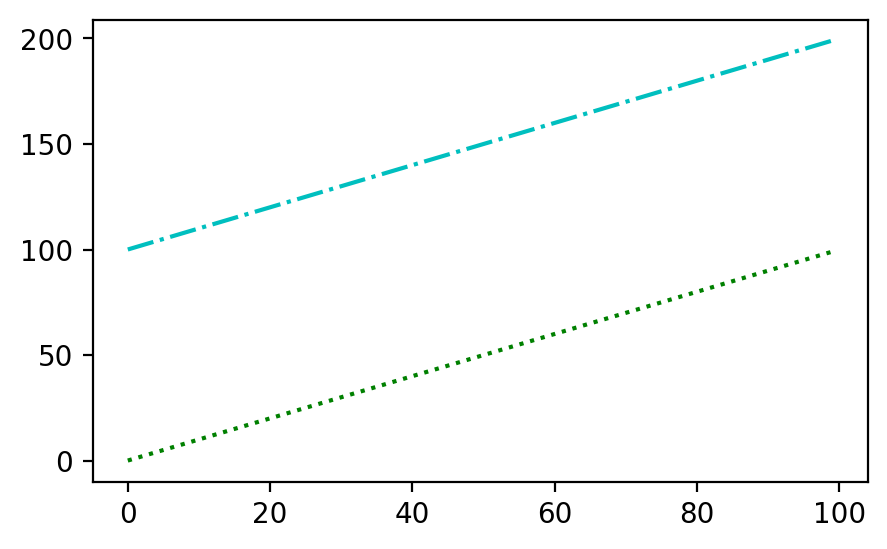

In [20]:
X = range(100)
Y1 = [x for x in X]
Y2 = [x+100 for x in X]

plt.plot(X, Y1, c="g", linestyle="dotted")
plt.plot(X, Y2, c="c", ls="dashdot")

plt.show()

#### 2.3 제목

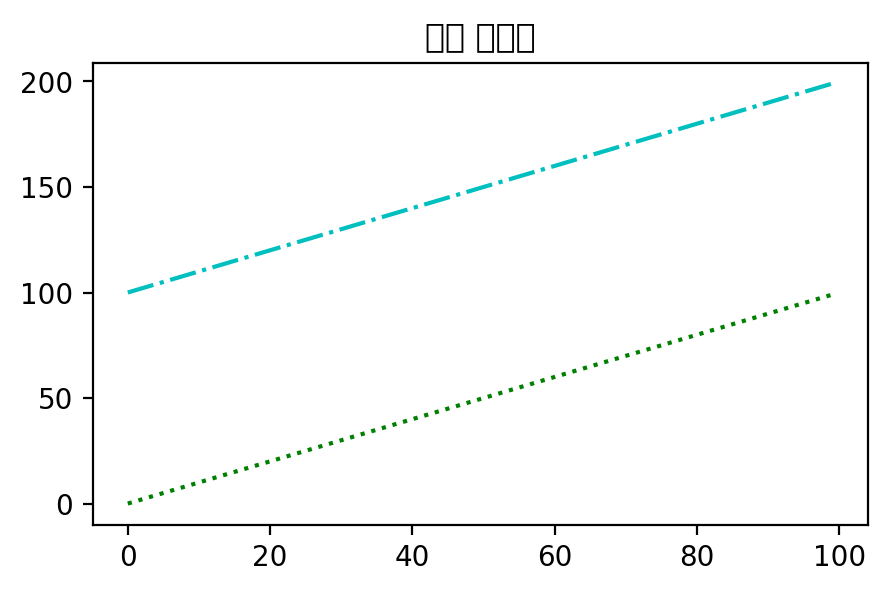

In [22]:
plt.plot(X, Y1, c="g", linestyle="dotted")
plt.plot(X, Y2, c="c", ls="dashdot")
plt.title("점선 그래프")

plt.show()

#### 2.4 범례
- legend 함수 사용하여 생성
- loc 매개변수로 범례의 위치 지정, 값은 center, upper right 등 총 11가지
- 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
- best라고 지정하면 적절한 위치에 범례가 놓임

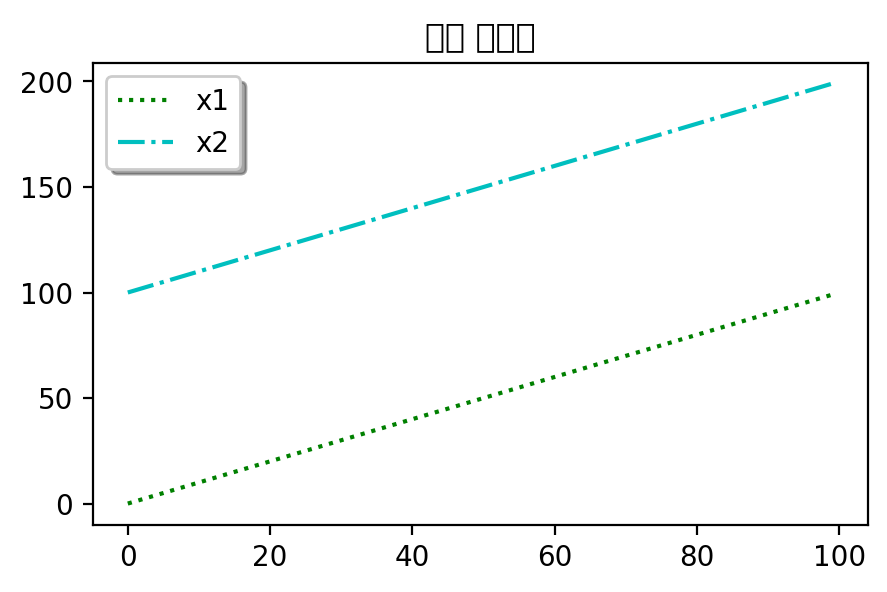

In [30]:
plt.plot(X, Y1, c="g", linestyle="dotted", label="x1")
plt.plot(X, Y2, c="c", ls="dashdot", label="x2")
plt.title("점선 그래프")
plt.legend(loc= "upper left", shadow=True, fancybox=True)

plt.show()

------------------

### 3. 맷플롯립에서 사용하는 그래프
- 데이터 테이블 전체를 지칭하는 객체
- 넘파이 배열의 특성을 그대로 가짐
- 인덱싱 : 열과 행 각각 사용하여 하나의 데이터에 접근

### 3.1 산점도(scatter)
- 매개변수 c는 포인트 색상을 지정
- marker는 포인트 모양을 지정
- size는 포인트 크기를 지정
- alpha는 포인트 불투명도를 지정

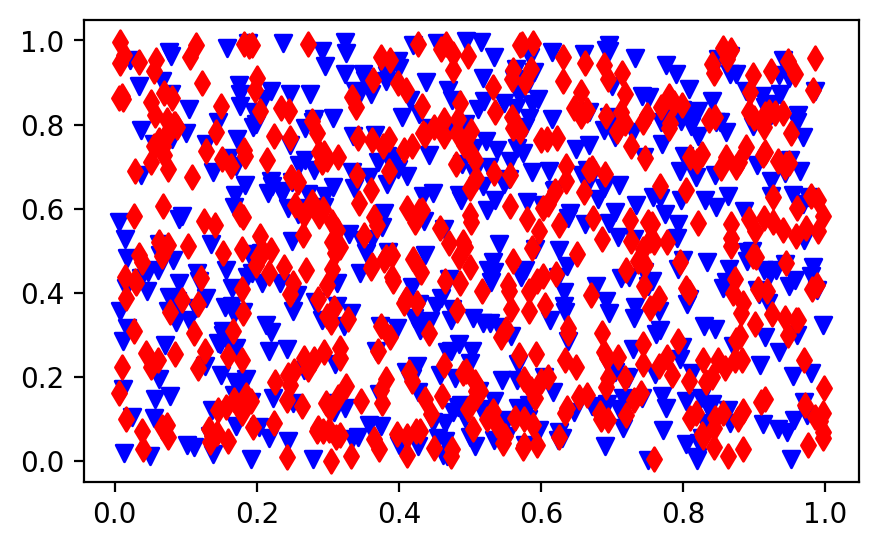

In [41]:
import numpy as np
data_1 = np.random.rand(512, 2)
data_2 = np.random.rand(512, 2)

plt.scatter(data_1[:, 0], data_1[:, 1], c="b", marker="v")
plt.scatter(data_2[:, 0], data_2[:, 1], c="r", marker="d")
plt.show()

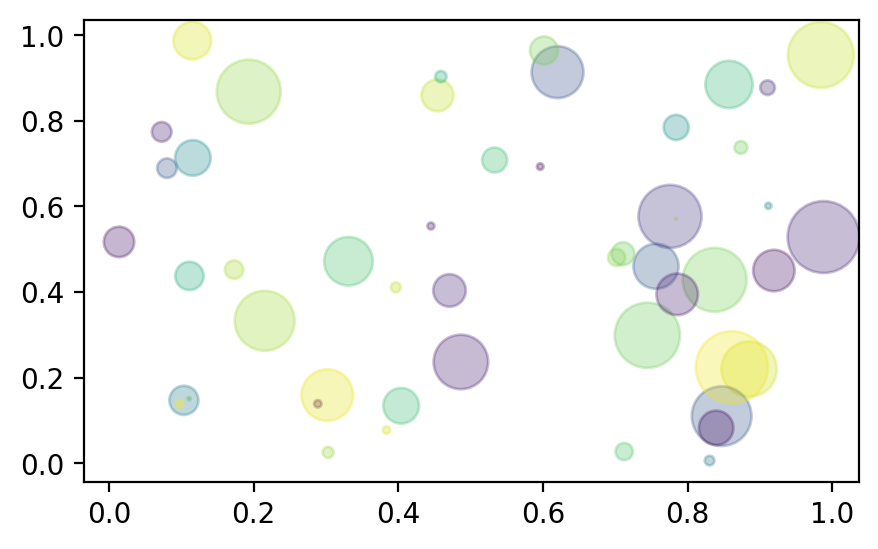

In [44]:
N = 50 # 데이터개수
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N) # 색상
area = np.pi * (15 * np.random.rand(N))**2

# print(f"colors: ", colors)
# print(f"area: ", area)

plt.scatter(x, y, c=colors, s=area, alpha=0.3)
plt.show()


### 3.2 막대그래프(bar)
- 데이터의 개수나 크기를 비교

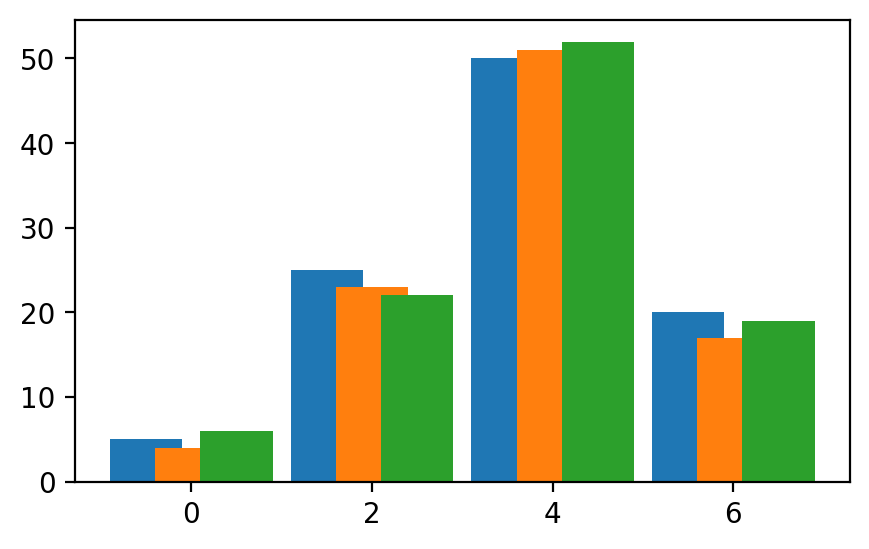

In [52]:
# (1) 데이터 생성
data = [[5., 25., 50., 20.],
        [4., 23., 51., 17],
        [6., 22., 52., 19]]

# (2) X 좌표 시작점
X = np.arange(0,8,2)

# (3) 3개의 막대그래프 생성
plt.bar(X+0.0, data[0])
plt.bar(X+0.5, data[1])
plt.bar(X+1.0, data[2])

# (4) X축에 표시될 이름과 위치 설정
# plt.xticks(X+0.5, ("A", "B", "C", "D"))
plt.xticks(X+0.5, X)

# (5) 막대그래프 출력
plt.show()

### 3.3 누적 막대그래프(stacked bar graph)
- 누적 막대그래프(stacked bar graph) : 데이터를 밑에서부터 쌓아올려 데이터를 표현

(3, 4)
[0 1 2 3]


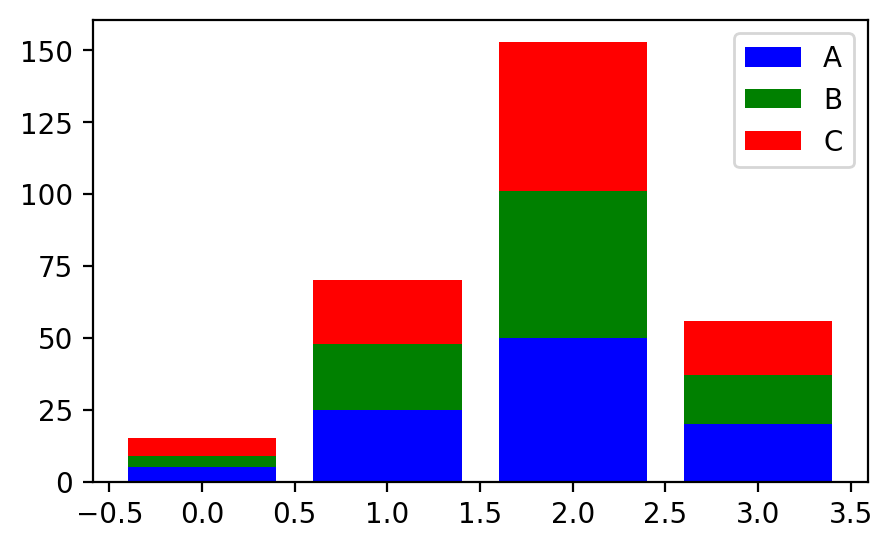

In [53]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[5., 25., 50., 20.],
                 [4., 23., 51., 17],
                 [6., 22., 52., 19]])
print(data.shape)

color_list = ['b', 'g', 'r']
data_label = ["A","B","C"]
X = np.arange(data.shape[1])
print(X)

for i in range(3):
    plt.bar(X, data[i],
            bottom = np.sum(data[:i], axis=0),
            color = color_list[i],
            label=data_label[i])

plt.legend()
plt.show()

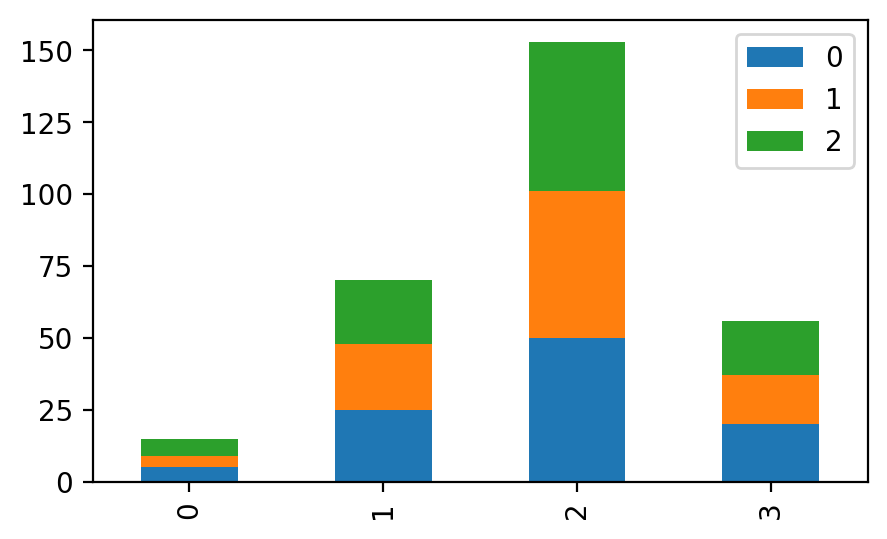

In [60]:
import pandas as pd
df = pd.DataFrame(data)
df.T.plot(kind= "bar", stacked=True, figsize=[5,3])

plt.legend()
plt.show()

### 3.3 히스토그램(histogram)
- 데이터의 분포를 표현

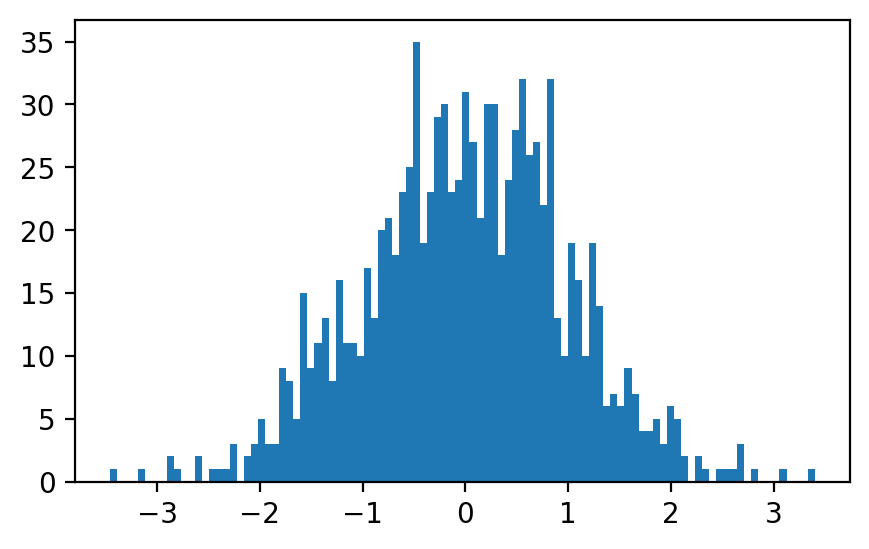

In [61]:
N = 1000
X = np.random.normal(size=N)

plt.hist(X, bins=100)
plt.show()

### 3.4 상자그림(boxplot)
- 상자그림(boxplot) : 사분위수를 시각화하여 데이터의 분포와 밀집 정도를 표현

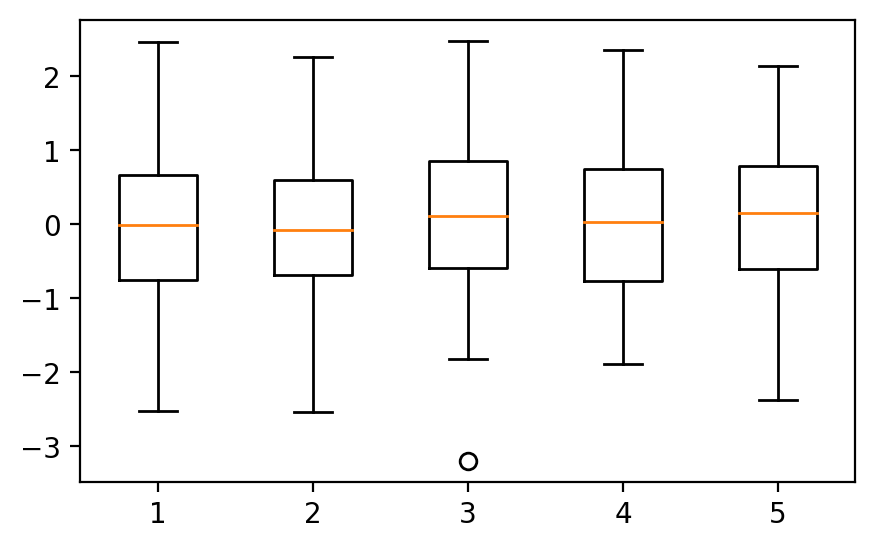

In [67]:
data = np.random.randn(100,5)

plt.boxplot(data, vert="False")

plt.show()

-----------------

## <a name="05.2시본">05.2 시본</a>

### 1. 시본의 기본 (Seaborn)
- 시본(seaborn) : 맷플롯립을 바탕으로 다양한 함수 사용을 돕는 일종의 래퍼(wrapper) 모듈
- 맷플롯립과 동일한 결과물이 나오며, 작성 과정이 간단
- xticks 설정하지 않아도 각 축에 라벨 자동으로 생성
- 데이터프레임과 x, y에 해당하는 열 이름만 지정하면 됨
- sns.set_style("그래프 스타일") : darkgrid(default), whitegrid, dark, white, ticks
- sns.despine() : 축, 테두리 지정 : left, right, top, bottom # default

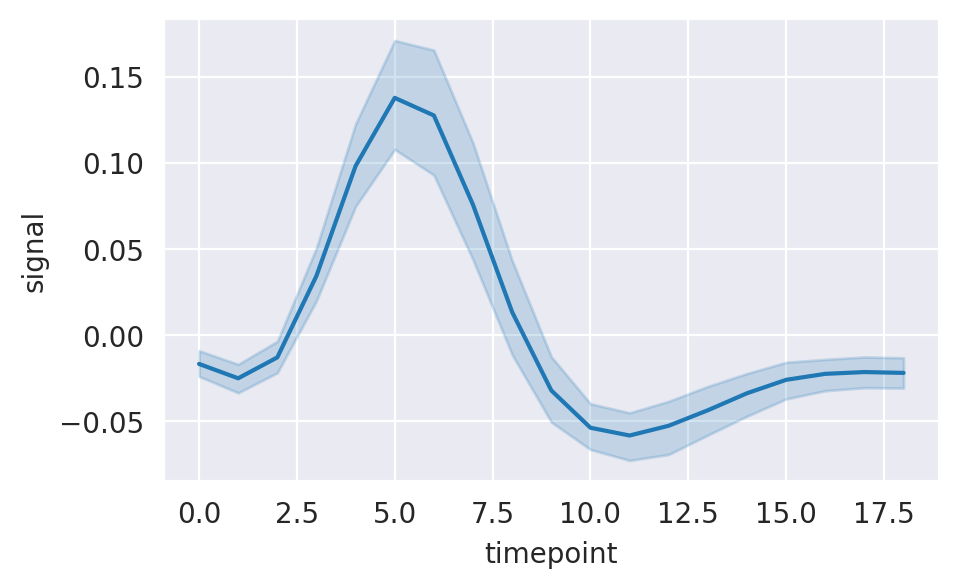

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                # (1)seaborn 모듈 호출

fmri = sns.load_dataset("fmri")       # (2) fmri 데이터셋 사용
sns.set_style()                       # (3) 기본 스타일 적용
sns.lineplot(x="timepoint", y="signal", data=fmri) # (4) 선그래프 작성
plt.show()

In [72]:
sns.get_dataset_names()  # Seaborn 데이터셋 목록

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [73]:
fmri.sample(n=10, random_state=1)

,subject,timepoint,event,region,signal
806,s6,18,cue,parietal,0.019532
691,s5,15,cue,frontal,-0.019507
148,s5,8,stim,parietal,0.006805
676,s13,0,cue,parietal,-0.018394
156,s11,7,stim,parietal,0.254042
27,s1,17,stim,parietal,-0.038021
200,s11,4,stim,parietal,0.087175
262,s3,0,stim,parietal,-0.008576
94,s4,12,stim,parietal,-0.090036
339,s4,5,stim,frontal,0.455575


<Axes: xlabel='timepoint', ylabel='signal'>

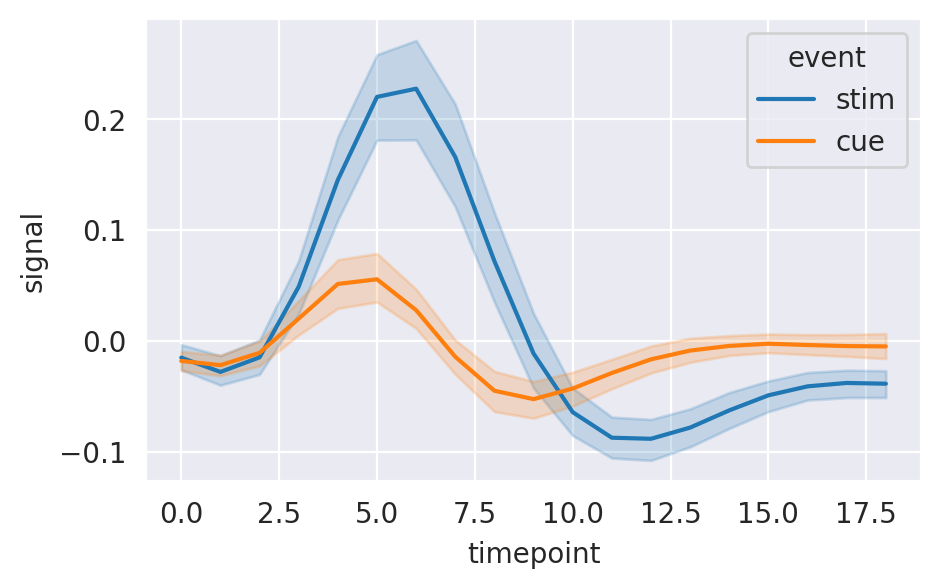

In [74]:
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)

In [76]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


### 2. 시본에서 사용하는 그래프

### 2.1 회귀 그래프
- 회귀 그래프(regression plot) : 회귀식을 적용하여 선형회귀 추세선을 그래프에 함께 작성
- 선형회귀 추세선 : 데이터를 기반으로 데이터의 x값 대비 y값 변화를 예측하는 직선
- 함수 regplot 사용

In [80]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

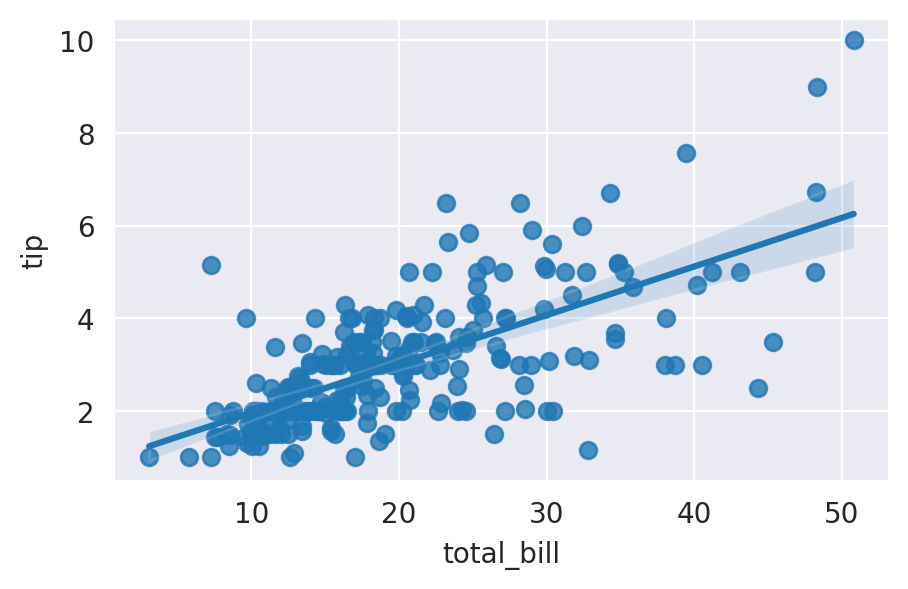

In [79]:
sns.regplot(x="total_bill", y="tip", data=tips, x_ci=95)

### 2.2 산점도
- 산점도(scatter plot) : x, y를 기준으로 데이터의 분포 표현
- 함수 scatterplot 사용

<Axes: xlabel='total_bill', ylabel='tip'>

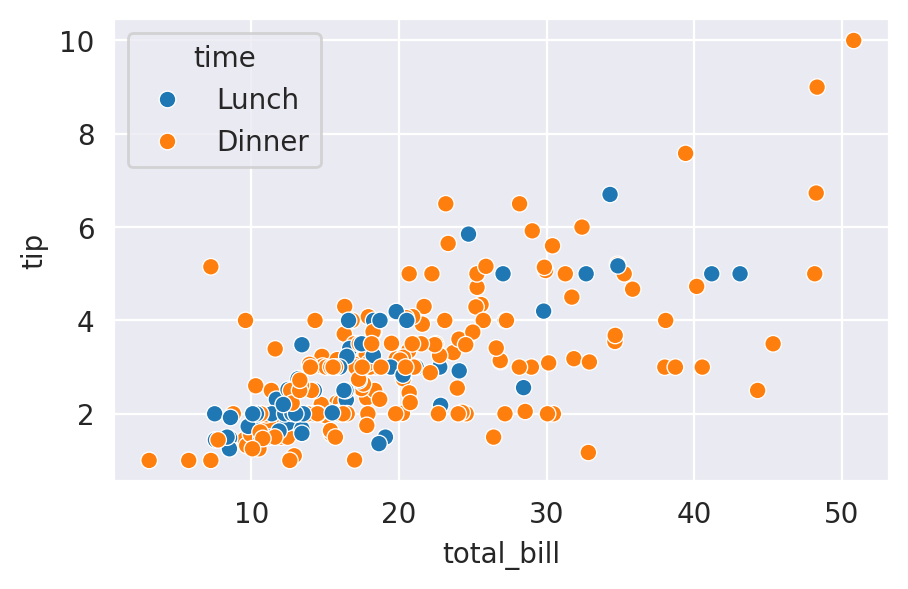

In [81]:
tips = sns.load_dataset("tips")
sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips)

### 2.3 비교 그래프
- 비교 그래프(counter plot) : 범주형 데이터의 항목별 개수

<Axes: xlabel='smoker', ylabel='count'>

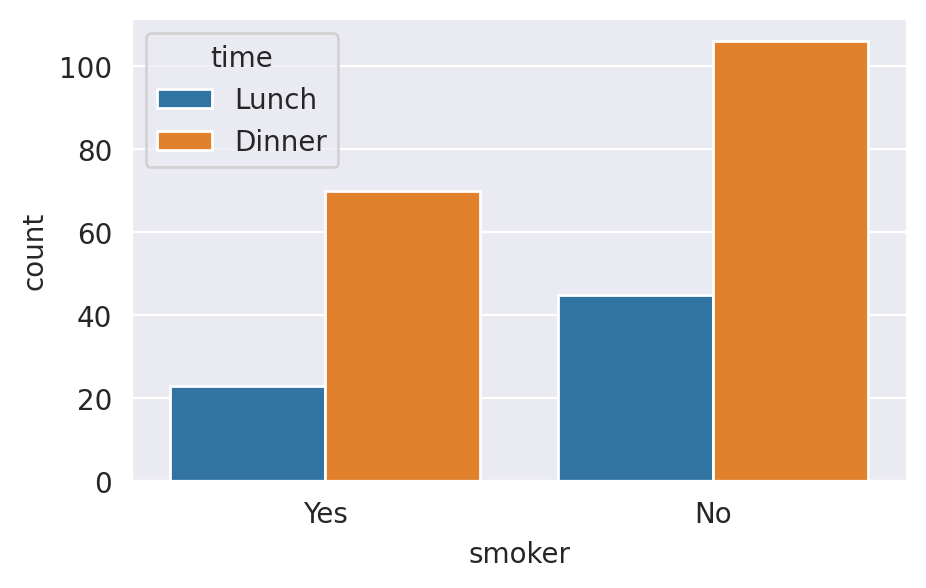

In [82]:
tips = sns.load_dataset("tips")
sns.countplot(x="smoker", hue="time", data=tips)

### 2.4 막대그래프
- y 값이 연속형 값일 경우 해당 값들의 평균을 나타냄
- 데이터의 신뢰구간을 검은색 막대로 표현
- 함수 barplot 사용

<Axes: xlabel='day', ylabel='total_bill'>

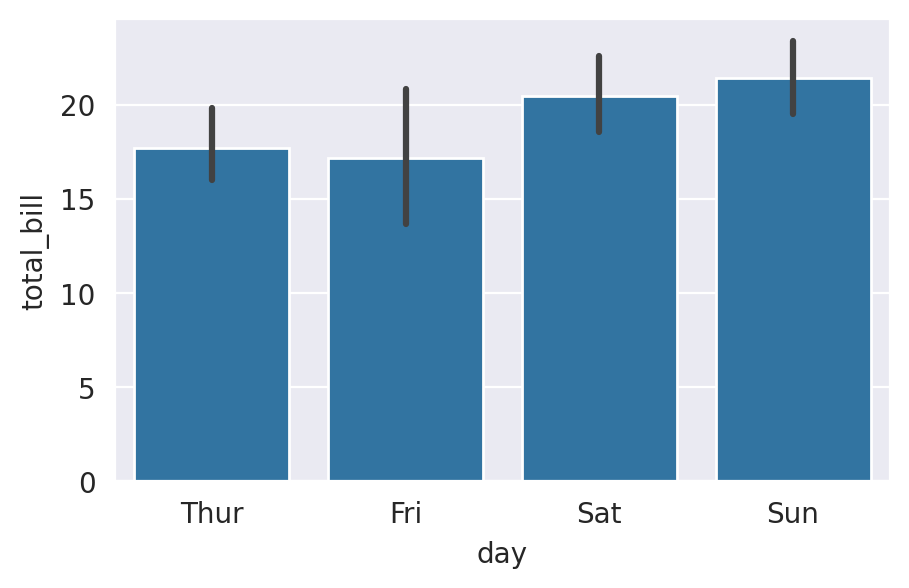

In [83]:
sns.barplot(x="day", y="total_bill", data=tips)

### 3. 3. 사전 정의된 그래프
- 맷플롯립 관점에서 여러 그래프들을 합쳐 정보를 추출
- 특히 범주형 데이터에 유용

#### 3.1 분포를 나타내는 그래프 : 바이올린 플롯과 스웜 플롯
- 바이올린 플롯(violin plot) : 상자그림과 분포도를 한 번에 나타낼 수 있음
- x축에는 범주형 데이터, y축에는 연속형 데이터

<Axes: xlabel='day', ylabel='total_bill'>

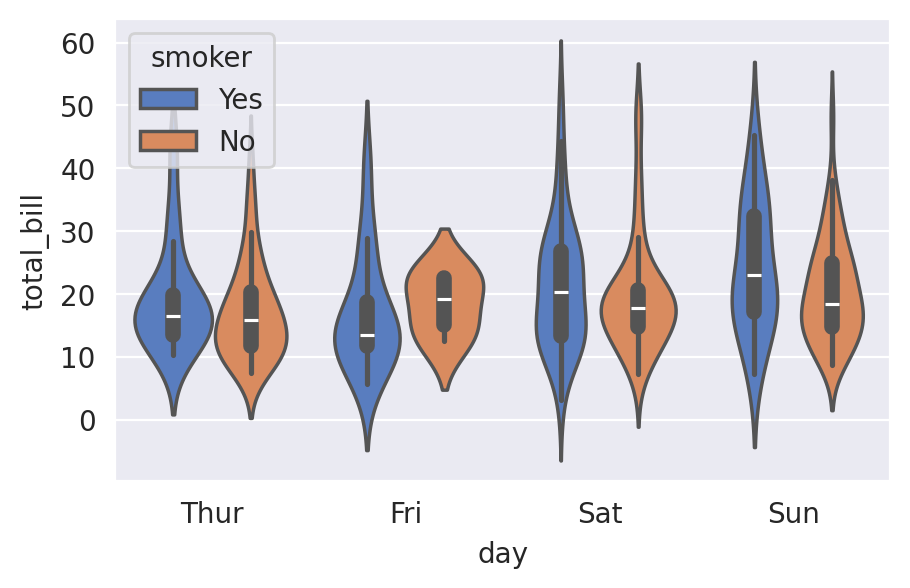

In [84]:
sns.violinplot(x="day", y="total_bill", hue="smoker",data=tips, palette="muted")

- 스웜 플롯(swarm plot) : 바이올린 플롯과 같은 형태에 산점도로 데이터 분포를 나타냄
- 매개변수 hue로 두 개 이상의 범주형 데이터를 점이 겹치지 않게 정리
- 영역별 데이터 양을 직관적으로 보여줌

<Axes: xlabel='day', ylabel='total_bill'>

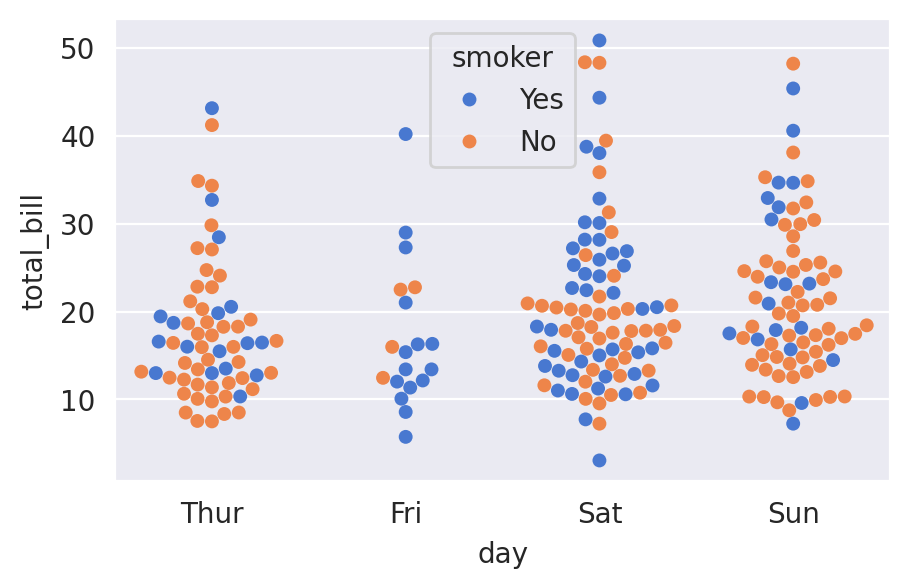

In [85]:
sns.swarmplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted")

#### 3.2 다양한 범주형 데이터를 나타내는 패싯그리드
- 패싯그리드(FacetGrid) : 그래프의 틀만 제공하여 적당한 그래프를 그려주는 클래스
- 그리드가 생성된 후 맵(map)을 사용하여 그래프 만듦
- 각 FacetGrid에 있는 개별 그래프 영역에 그래프를 집어넣는 구조
- 전체 데이터를 범주형 데이터의 다양한 관점에서 나눠서 볼 수 있음

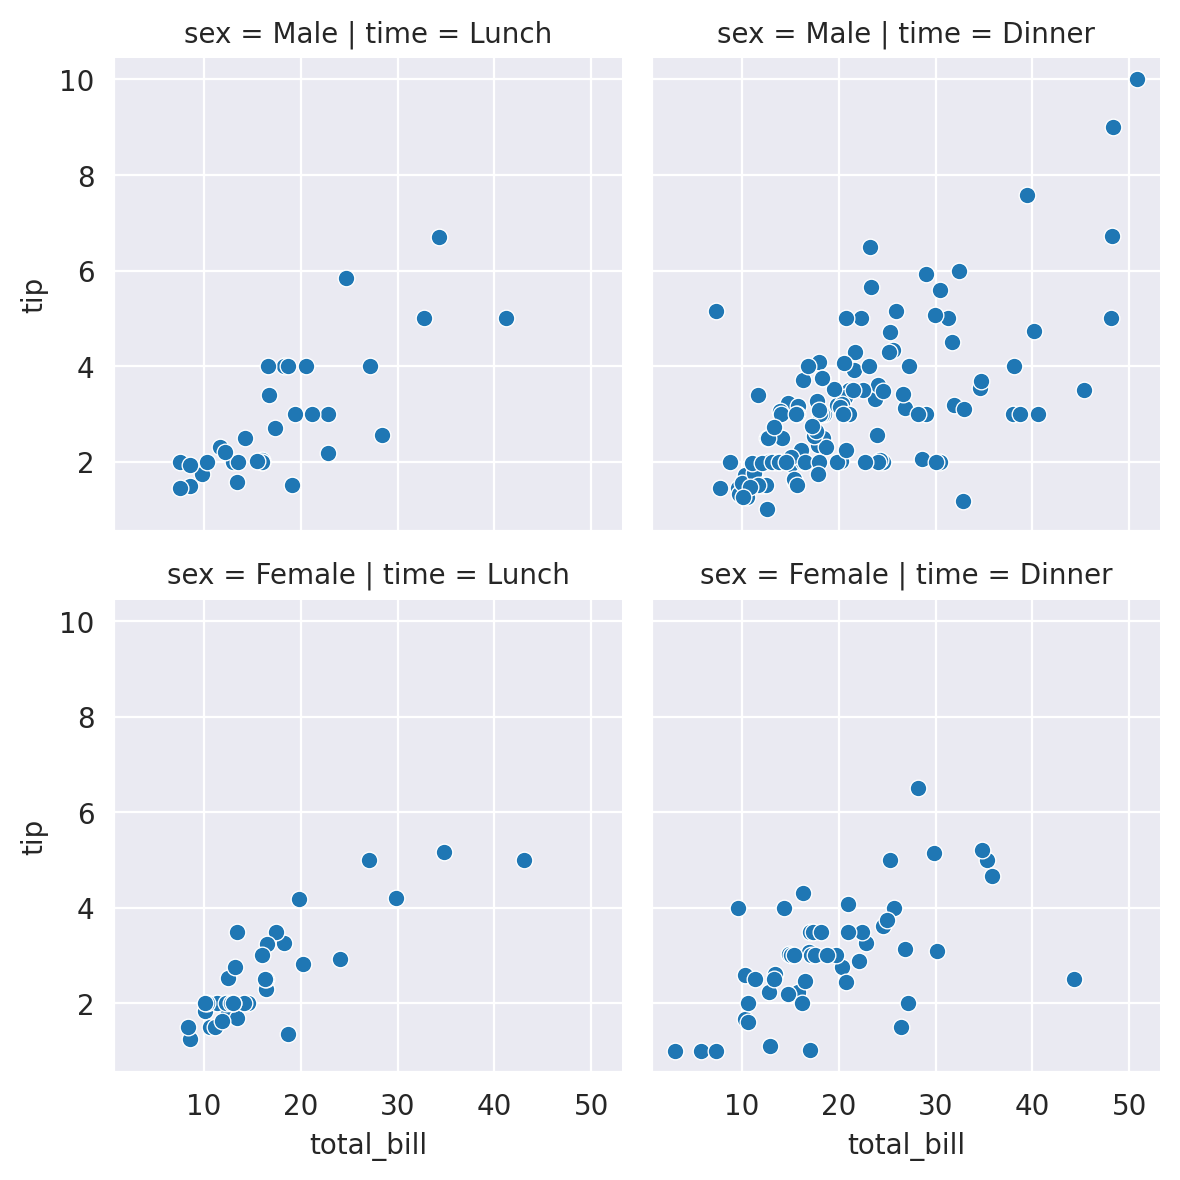

In [86]:
g = sns.FacetGrid(tips, col="time", row="sex")

g.map(sns.scatterplot, "total_bill", "tip")

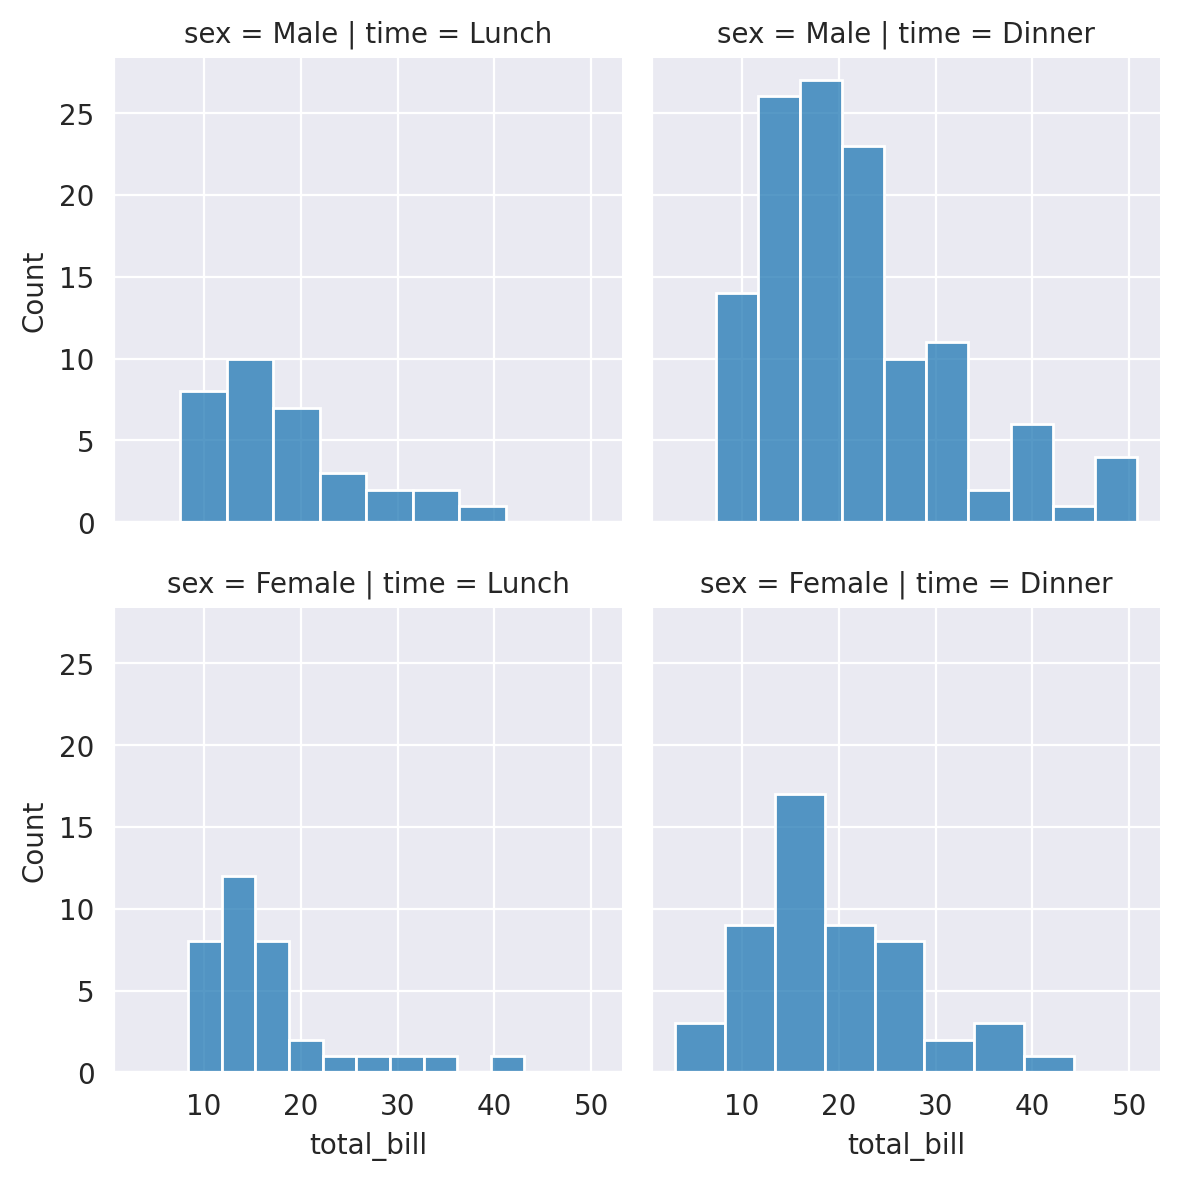

In [87]:
g = sns.FacetGrid(tips, col="time", row="sex")

g.map_dataframe(sns.histplot, x="total_bill")


------------------------

## <a name="05.3플롯리">05.3 플롯리</a>

### 1. 플롯리의 특징
- 플롯리(plotly) : 비즈니스 인텔리전스(Business Intelligence) 대시보드로 개발된 도구
- 맷플롯립이나 시본은 데이터 분석가들이 데이터의 형태나 분포를 살피기 위해 코드로 사용하는 도구
- 문법은 맷플롯립이나 시본과 유사
- 인터랙션 그래프를 지원
 - - 생성된 그래프에 마우스 커서를 올리면 데이터를 볼 수 있음 (인터랙션 그래프)

In [88]:
import plotly.express as px

df = px.data.iris()     # iris는 판다스 데이터프레임
fig = px.scatter(df, x="sepal_width", y="sepal_length")
fig.show()

In [90]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


### 좌표 그래프(coordinates plot)
- 데이터 간 관계를 표현(시본은 제공하지 않지만 플롯리에서 제공하는 기능)

In [89]:
fig = px.parallel_coordinates(df, color="species_id",
        labels={"species_id": "Species",
                "sepal_width": "Sepal Width",
                "sepal_length": "Sepal Length",
                "petal_width": "Petal Width",
                "petal_length": "Petal Length", },
                color_continuous_scale=  px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

-----------------

## <a name="예제:전세계행복지수">예제: 전세계행복지수 분석</a>

### 1. 파일의 데이터 읽어오기
- Ladder score : 행복지수

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

filename = './world-happiness-report-2021.csv'
happiness_data = pd.read_csv(filename)
happiness_data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


### 2.데이터 살펴보기

In [7]:
happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [8]:
happiness = happiness_data.iloc[:,[0,1,2,6,7,8,9,10,11]]
happiness.head(5)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


### 데이터 통계치 살펴보기
* 전체 나라 수, 행복지수의 최댓값, 행복지수 평균, 행복지수 최솟값

In [9]:
happiness.describe()   # 기술통계 정보

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


- **행복지수(Ladder score) 속성을 기준으로 내림차순 정렬: 특정 국가 조회**

In [10]:
#'행복지수' 속성을 기준으로 내림차순 정렬 후, 국가명(Country name)이 'South Korea'인 행을 찾아 출력
happiness = happiness.sort_values('Ladder score', ascending=False)
happiness.loc[happiness['Country name']=='South Korea']

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
61,South Korea,East Asia,5.845,10.651,0.799,73.9,0.672,-0.083,0.727


- **가로막대형그래프 시각화** : 행복지수가 높거나, 낮은 국가

<ipython-input-11-167da733b361>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ladder score', y='Country name', data=happinessFilter, palette='coolwarm')


<Axes: xlabel='Ladder score', ylabel='Country name'>

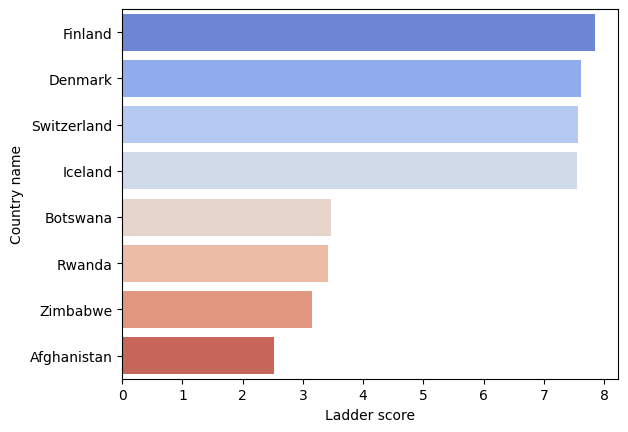

In [11]:
happinessFilter = happiness[(happiness.loc[:,'Ladder score']>=7.5) |\
                            (happiness.loc[:,'Ladder score']<=3.5)]
sns.barplot(x='Ladder score', y='Country name', data=happinessFilter, palette='coolwarm')

### [실습]
*  해보기
  * 다음 조건에 맞는 가로형 막대그래프를 출력해 봅시다.
  1. 1인당 국내총생산을 기준으로 내림차순으로 정렬한다.
  2. x축을 1인당 국내총생산(Logged GDP per capita)으로 변경한다.
  3. 1인당 국내총생산이 11.1 이상인 나라와 7.2 이하인 나라만 그래프로 표현한다.
  4. 색상팔레트를 'PiYG'로 설정한다.

In [108]:
happiness_data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [12]:
happiness_GDP = happiness_data.iloc[:, [0, 2, 6]]
happiness_GDP = happiness_GDP.sort_values("Logged GDP per capita", ascending=False)
happiness_GDP.head()

,Country name,Ladder score,Logged GDP per capita
7,Luxembourg,7.324,11.647
31,Singapore,6.377,11.488
14,Ireland,7.085,11.342
2,Switzerland,7.571,11.117
24,United Arab Emirates,6.561,11.085


In [13]:
happiness_GDP_filter = happiness_GDP[(happiness_GDP.loc[:, "Logged GDP per capita"] >= 11.1|\
                                      happiness_GDP.loc[:, "Logged GDP per capita"] <= 7.2)]
sns.barplot(x="Logged GDP per capita", y="Contry name", data=happiness_GDP_filter, palette="PiYG")

TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [bool]

-----------

### 탐색정보1.
#### 지역별 행복지수의 분포 시각화
* 시본의 boxplot()메소드
  * sns.boxplot(x='속성명', y='속성명', data=데이터프레임 객체)

<Axes: xlabel='Ladder score', ylabel='Regional indicator'>

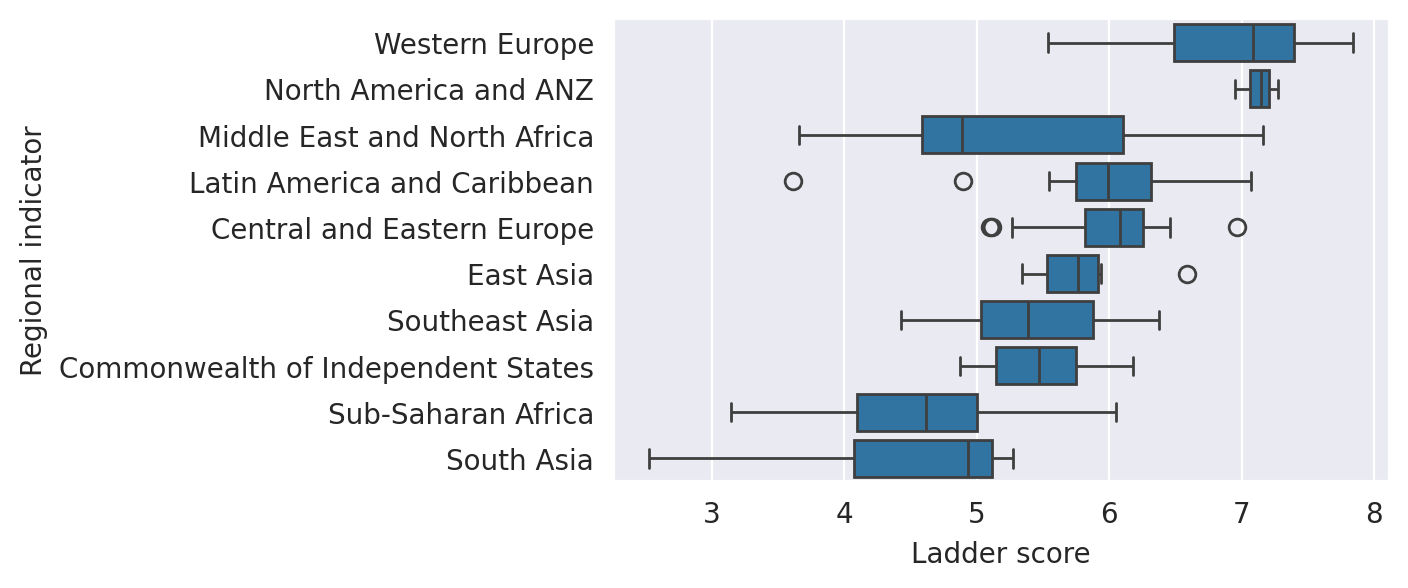

In [117]:
sns.boxplot(x='Ladder score', y='Regional indicator', data=happiness, orient='h')

In [ ]:
sns.boxplot(x='Regional indicator', y='Ladder score', data=happiness, orient='v')
plt.xticks(rotation=80)

In [118]:
df_data = happiness[['Regional indicator', 'Ladder score']]

df_data.groupby(['Regional indicator'])['Ladder score'].agg(**{'최소값':'min', '최대값':'max'}).reset_index()

# df_data.groupby(['Regional indicator'])['Ladder score'].quantile(.5)

,Regional indicator,최소값,최대값
0,Central and Eastern Europe,5.101,6.965
1,Commonwealth of Independent States,4.875,6.179
2,East Asia,5.339,6.584
3,Latin America and Caribbean,3.615,7.069
4,Middle East and North Africa,3.658,7.157
5,North America and ANZ,6.951,7.277
6,South Asia,2.523,5.269
7,Southeast Asia,4.426,6.377
8,Sub-Saharan Africa,3.145,6.049
9,Western Europe,5.536,7.842


### 상관계수 시각화
* px.imshow(데이터프레임객체.corr(), text_auto=True)

In [119]:
fig = px.imshow(happiness.corr(), text_auto=True)
fig.update_layout(title='상관관계 시각화', width=800, title_x=0.5)
fig.show()

ValueError: could not convert string to float: 'Finland'

-----------------------

### 탐색정보2.
* 전세계 행복지수를 한눈에 보기 위해 반응형 그래프 그리기
  * treemap()
  * sunburst()
  * choropleth()

### treemap 시각화
* treemap
  * 계층(트리구조)을 이루는 데이터 전체와 일부분 간의 관계를 파악하기 위한 시각화 기법
  * 범주간의 정확한 비교보다 큰 특징을 살펴볼 때 주로 사용

* `px.treemap(data_frame=데이터프레임객체, path=[부모열,자식열], values=열속성, color=열속성)`
  * path는 [부모,자식] 순서로 작성
  * values는 사각형 크기가 나타내는 속성
  * color는 색상으로 표현하는 속성

In [ ]:
fig = px.treemap(data_frame=happiness,
                 path=['Regional indicator','Country name'],
                 values='Ladder score',
                 color='Ladder score')
fig.show()

In [110]:
# 그래프 제목 넣기
fig = px.treemap(data_frame=happiness,
                 path=[px.Constant('world'),'Regional indicator','Country name'],
                 values='Ladder score',
                 color='Ladder score')
fig.update_layout(title='나라별 행복 지수', title_x=0.5, width=900, height=900)
fig.show()

### sunburst 시각화
* px.sunburst(data_frame=데이터프레임객체, path=[부모열, 자식열], values=열속성, color=열속성)

In [111]:
fig = px.sunburst(data_frame=happiness,
                  path=['Regional indicator', 'Country name'],
                  values='Ladder score',
                  color='Ladder score')
fig.update_layout(title='나라별 행복 지수', title_x=0.5, width=1200, height=900)
fig.show()

### choropleth
* px.choropleth(data_frame=데이터프레임객체, location='열이름', locationmode='country names', color='열이름')

In [112]:
px.choropleth(data_frame=happiness,
              locations='Country name',
              locationmode='country names',
              color='Ladder score')

### 애니메이션 효과 사용하기

In [114]:
filename = './world-happiness-report-all.csv'
happiness_year_data = pd.read_csv(filename)
happiness_year_data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [115]:
# 애니메이션 효과
fig = px.choropleth(data_frame=happiness_year_data.sort_values('year'),
                    locations='Country name',
                    locationmode='country names',
                    color='Life Ladder',
                    animation_frame='year')
fig.update_layout(title='연도별 전 세계 행복지수')
fig.show()